In [1]:
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
def process_node_data(directory):
    with open(directory + "txBlockNum.txt") as f:
        tx_data = json.loads(f.read())
    with open(directory + "timestamps.txt") as f:
        timestamps = json.loads(f.read())
    
    tx_df = pd.DataFrame(tx_data)

    filenames = ["authorisation.txt",\
                "creation_1000.txt",\
                "creation_500.txt",\
                "creation_4000.txt",\
                "registration.txt",\
                "transfer.txt"]
    df = pd.DataFrame()
    for file in filenames:
        with open(directory + file) as f:
            _data = pd.DataFrame(json.loads(f.read()))
            _data['type'] = file[:-4]
            df = df.append(_data)

    df = df.merge(tx_df, on="txHash")

    def get_blockTime(row):
        blockNum = str(row['blockNumber'])
        return timestamps[blockNum]

    def calculate_latency(row):
        receipt = row['blockTime'] * 1000
        return max(receipt - row['time'], 0)

    df['blockTime'] = df.apply(get_blockTime, axis=1)

    df['latency'] = df.apply(calculate_latency, axis=1)

    latency = {}
    for item in df['type'].unique():
        latency[item] = df[df['type'] == item]['latency'].describe()['mean']

    throughput = {}
    for item in df['type'].unique():
        time = df[df['type'] == item]['blockTime'].describe()['max'] - df[df['type'] == item]['blockTime'].describe()['min']
        numTx = len(df[df['type'] == item])
        throughput[item] = numTx / time
        
    return latency, throughput

In [8]:
latency, throughput = process_node_data("nodes_1/")

In [9]:
latency

{'authorisation': 575.742,
 'creation_1000': 455.302,
 'creation_500': 29.9,
 'creation_4000': 1595.61575,
 'registration': 5629.045275590551,
 'transfer': 1479.914}

In [10]:
throughput

{'authorisation': 250.0,
 'creation_1000': 500.0,
 'creation_500': 500.0,
 'creation_4000': 333.3333333333333,
 'registration': 56.44444444444444,
 'transfer': 500.0}

In [14]:
directories = ["nodes_1/", "nodes_2/", "nodes_4/", "nodes_8/"]
latency = []
throughput = []
for dirname in directories:
    print(dirname)
    latency_temp, throughput_temp = process_node_data(dirname)
    latency.append(latency_temp)
    throughput.append(throughput_temp)

nodes_1/
nodes_2/


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars


nodes_4/
nodes_8/


In [58]:
latency

[{'authorisation': 575.742,
  'creation_1000': 455.302,
  'creation_500': 29.9,
  'creation_4000': 1595.61575,
  'registration': 5629.045275590551,
  'transfer': 147.99},
 {'authorisation': 1238.37,
  'creation_1000': 1292.688,
  'creation_500': 790.93,
  'creation_4000': 4795.3925,
  'registration': 4607.578740157481,
  'transfer': 279.62525050100203},
 {'authorisation': 2210.072,
  'creation_1000': 1283.11,
  'creation_500': 3641.654,
  'creation_4000': 7982.022184300341,
  'registration': 11404.273622047243,
  'transfer': 325.96},
 {'authorisation': 727.56,
  'creation_1000': 1984.813,
  'creation_500': 3507.73,
  'creation_4000': 9128.625,
  'registration': 12747.0826,
  'transfer': 402.524,
  'authorisaton': 2727.56}]

In [44]:
# adjust data
latency[3]['authorisaton'] = 2727.56
latency[2]['creation_1000'] = 1283.11
latency[3]['creation_1000'] = 1984.813
latency[3]['creation_500'] = 3507.73
latency[3]['creation_4000'] = 9128.625
latency[3]['registration'] = 12747.0826
latency[0]['transfer'] = 147.99
latency[2]['transfer'] = 325.96

In [39]:
throughput

[{'authorisation': 250.0,
  'creation_1000': 500.0,
  'creation_500': 500.0,
  'creation_4000': 333.3333333333333,
  'registration': 56.44444444444444,
  'transfer': 500.0},
 {'authorisation': 250.0,
  'creation_1000': 250.0,
  'creation_4000': 125.0,
  'registration': 72.57142857142857,
  'transfer': 124.75},
 {'authorisation': 50.0,
  'creation_1000': 142.85714285714286,
  'creation_500': 83.33333333333333,
  'creation_4000': 35.515151515151516,
  'registration': 31.75},
 {'authorisation': 50.0,
  'creation_1000': 58.8235294117647,
  'creation_500': 50.0,
  'creation_4000': 47.92857142857143,
  'registration': 31.75,
  'transfer': 83.33333333333333}]

In [38]:
del throughput[1]['creation_500']
del throughput[2]['transfer']


In [24]:
sum(latency[0].values())

9765.51902559055

In [29]:
sum(list(latency[0].values()))

9765.51902559055

In [45]:
import numpy as np

latency_registration = [x['registration'] for x in latency]
latency_all = [np.array(list(x.values())).mean() for x in latency]
latency_key = [mean([x[i] for i in x.keys() if i != 'registration']) for x in latency]

In [46]:
latency_registration

[5629.045275590551, 4607.578740157481, 11404.273622047243, 12747.0826]

In [47]:
latency_all

[1405.5991709317584, 2167.4307484430806, 4474.515301057931, 4460.8420857142855]

In [48]:
latency_key

[560.90995, 1679.4011501002003, 3088.563636860068, 3079.802]

In [40]:
throughput_registration = [x['registration'] for x in throughput]
throughput_all = [np.array(list(x.values())).mean() for x in throughput]
throughput_key = [mean([x[i] for i in x.keys() if i != 'registration']) for x in throughput]

In [41]:
throughput_registration

[56.44444444444444, 72.57142857142857, 31.75, 31.75]

In [42]:
throughput_all

[356.62962962962956, 164.46428571428572, 68.69112554112554, 53.63923902894491]

In [43]:
throughput_key

[416.6666666666667, 187.4375, 77.92640692640693, 58.017086834733895]

In [49]:
nodes = [1, 2, 4, 8]

In [53]:
SMALL_SIZE = 18
SMALLER_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

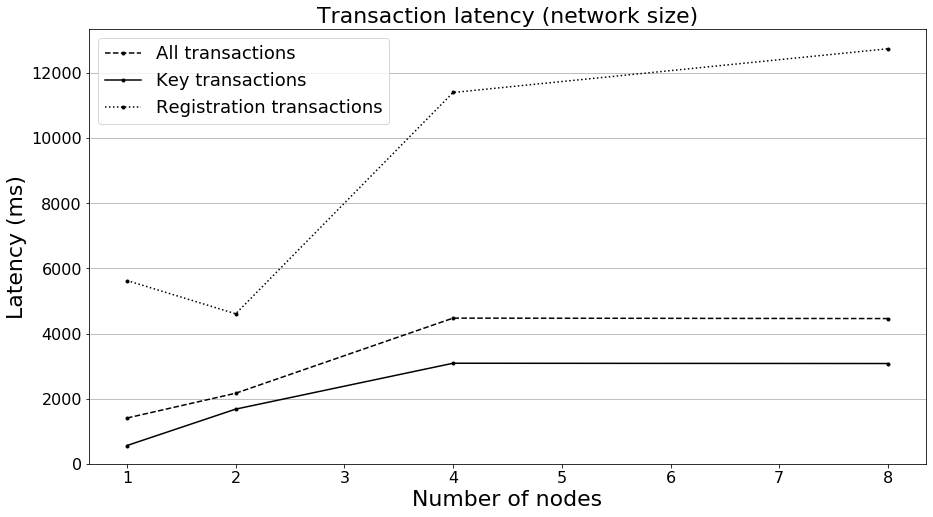

In [69]:
plt.figure(num=None, figsize=(15,8))
plt.plot(nodes, latency_all, 'k.--', label='All transactions')
plt.plot(nodes, latency_key, 'k.-', label='Key transactions')
plt.plot(nodes, latency_registration, 'k.:', label='Registration transactions')

plt.xlabel('Number of nodes')
plt.ylabel('Latency (ms)')
plt.title('Transaction latency (network size)')
plt.ylim(bottom=0)
plt.grid(True, axis='y')
plt.legend()
plt.savefig('latency.png')
plt.show()

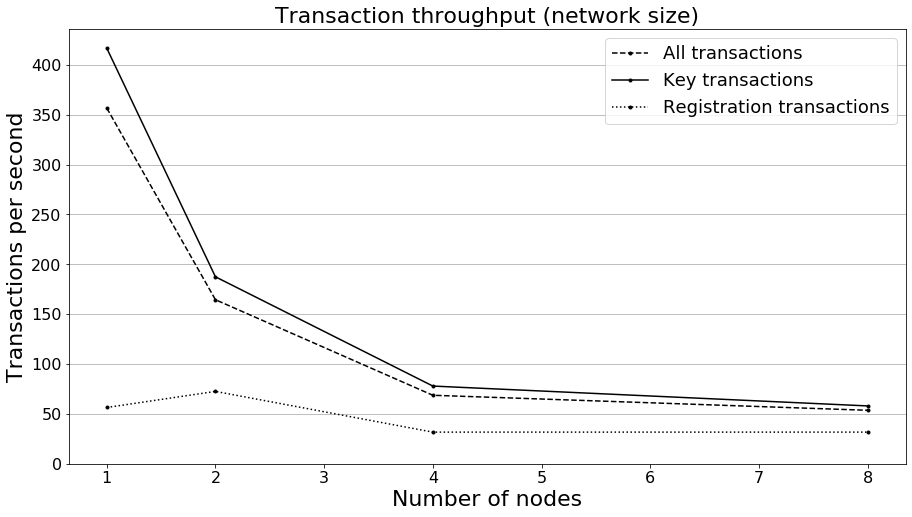

In [70]:
plt.figure(num=None, figsize=(15,8))
plt.plot(nodes, throughput_all, 'k.--', label='All transactions')
plt.plot(nodes, throughput_key, 'k.-', label='Key transactions')
plt.plot(nodes, throughput_registration, 'k.:', label='Registration transactions')

plt.xlabel('Number of nodes')
plt.ylabel('Transactions per second')
plt.title('Transaction throughput (network size)')
plt.ylim(bottom=0)
plt.grid(True, axis='y')
plt.legend()
plt.savefig('throughput.png')
plt.show()

In [61]:
latency_tx = []
latency_tx.append([latency[0]['creation_500'], latency[0]['creation_1000'], latency[0]['creation_4000']])
latency_tx.append([latency[1]['creation_500'], latency[1]['creation_1000'], latency[1]['creation_4000']])
latency_tx.append([latency[2]['creation_1000'], latency[2]['creation_500'], latency[2]['creation_4000']])
latency_tx.append([latency[3]['creation_1000'], latency[3]['creation_500'], latency[3]['creation_4000']])

In [62]:
latency_tx

[[29.9, 455.302, 1595.61575],
 [790.93, 1292.688, 4795.3925],
 [1283.11, 3641.654, 7982.022184300341],
 [1984.813, 3507.73, 9128.625]]

In [64]:
throughput_tx = [
    [500, 500, 333],
    [500, 250, 125],
    [142, 83, 35],
    [58.823, 50, 47.928]
]

In [66]:
xval = [500, 1000, 4000]

In [78]:
SMALL_SIZE = 18
SMALLER_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

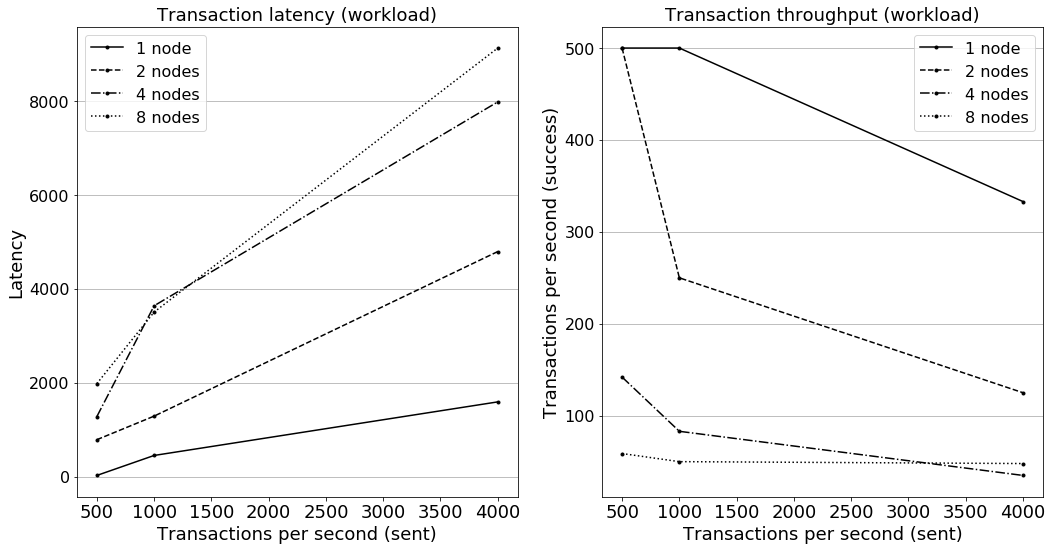

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))

axs[0].plot(xval, latency_tx[0], 'k.-', label='1 node')
axs[0].plot(xval, latency_tx[1], 'k.--', label='2 nodes')
axs[0].plot(xval, latency_tx[2], 'k.-.', label='4 nodes')
axs[0].plot(xval, latency_tx[3], 'k.:', label='8 nodes')
axs[1].plot(xval, throughput_tx[0], 'k.-', label='1 node')
axs[1].plot(xval, throughput_tx[1], 'k.--', label='2 nodes')
axs[1].plot(xval, throughput_tx[2], 'k.-.', label='4 nodes')
axs[1].plot(xval, throughput_tx[3], 'k.:', label='8 nodes')
axs[0].set_xlabel('Transactions per second (sent)')
axs[0].set_ylabel('Latency')
# axs[0].set_ylim(bottom=220000)
# axs[0].set_yticks(np.arange(220000, 280000, step=20000))
axs[0].grid(True, axis='y')
axs[0].legend()
axs[0].set_title("Transaction latency (workload)")

axs[1].set_xlabel('Transactions per second (sent)')
axs[1].set_ylabel('Transactions per second (success)')
# axs[1].set_ylim(bottom=220000)
# axs[1].set_yticks(np.arange(220000, 270000, step=10000))
axs[1].grid(True, axis='y')
axs[1].legend()
axs[1].set_title("Transaction throughput (workload)")
fig.tight_layout()
fig.savefig('tx_rate.png')
plt.show()